<a href="https://colab.research.google.com/github/guesar2/Proyecto_FC/blob/main/proyecto_fc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Ising Clásico Bidimensional en una grilla *N x N* Espines: Monte Carlo

 ### Fiorela Acuña, Diego Solano, Aaron Sanabria Martínez, Guillermo Escobar Arrieta

## El modelo de Ising

Este modelo es una herramienta práctica y sencilla para llegar a una relación de la mecánica estadística y la teoría cuántica de campos; principalmente se usa en mecánica estadística para simular sistemas magnéticos con el fin de analizar sus propiedades de ferromagnétismo, a partir del análisis de sistema de espines representados en una grilla y los intercambios de energía por interacciones entre espines (Molignini P.,2013).

La grilla se ve representada por valores discretos de $\sigma_{i}$ asignados en cada punto de esta y que identifican el espín en dicha posición. En este caso los valores posibles son de 1 y -1 (espín $\uparrow$ y $\downarrow$ respectivamente).

El hamiltoniano asociado a estos sistemas es:

$$
\hat{H} = - \sum_{ \left< i,j \right>}^{N} J_{ij} \hat{\sigma}^{z}_{i} \hat{\sigma}^{z}_{j} - g \sum_{i=1}^{N} \hat{\sigma}^{x}_{i},
$$

donde tenemos:
- Las matrices de Pauli **$\sigma_{i}^{z}$** y **$\sigma_{i}^{x}$**.
- La escala energética asociada a la interacción ferromagnética **$J_{ij}$**.
- El parámetro energético del campo magnético transversal externo **g**.

De este modo, el primer término define la interacción de pares de espines en la grilla y el segundo la interacción de todos los espines con el campo magnético externo.

Por otra parte, el ferromagnetismo es la propiedad de los materiales a tener un ordenamiento magnético. Es decir, indica que los espines se matienen alineados en la misma dirección, ya sea todos los espines $\uparrow$ o $\downarrow$, posterior a la aplicación de un campo magnético externo. Existe una magnetización espontánea ante la ausencia de un campo magnético.

Sin emabargo, según Bennett (2016) esto sucede solo en materiales que se encuentran por debajo de la temperratura de Curie ($T_{c}$), dado que por encima de ella los espines pueden desordenarse y el material sería paramagnético.

El parámetro de $J_{ij}$ ayuda a identificar la propiedad magnética del material:
- Si es positivo, los espines tienden a estar alineados y el material sería ferromagnético.
- Si es negativo, los espines tienden a repeleerse entre sí y el material sería antiferromagnético.

En caso de no tener un campo magnético externo (g = 0), el Hamiltoniano se reduce solo a las interaciones entre espines:

$$
\hat{H} = - \sum_{ \left< i,j \right>}^{N} J_{ij} \hat{\sigma}^{z}_{i} \hat{\sigma}^{z}_{j}
$$


Para poder realizar una implementación númerica de este modelo, se toman las siguientes simplificaciones:
- Se toma $J_{ij} \Rightarrow J > 0$ para todas las interaciones de los espines
- Se trabaja con una red cuadrada de NxN, la cual tiene una cantidad de configuraciones posibles son de *$2^{N^{2}}$*
- Dominan las interacciones entre espines de los vecinos más cercanos

Por tanto, el hamiltoniano toma la siguiente forma:

$$
\hat{H} = -J \sum_{ i=1}^{N} \hat{\sigma}^{z}_{i} \hat{\sigma}^{z}_{i +1} - g \sum_{i=1}^{N} \hat{\sigma}^{x}_{i}
$$

## Algoritmo de Metrópolis

El algoritmo que se va a utilizar en este proyecto es conocido como Metropolis, y está basado en una simulación de Monte Carlo (como se verá más adelante). Otros procedimiento requerirían tomar números aleatorios, hacer las mediciones del método y luego calcular sus pesos respecto de factor de Boltzmann; lo cual implicaría un mayor costo computacional para obtener mediciones válidas. Por otro lado, Metropolis toma estados con base en los factores de Boltzmann, de modo que estos tienen el mismo peso.

Primeramente, se genera una configuración aleatoria de _spin_ con energía ̣$E_0$. Luego, se escoge un _spin_ aleatorio para someterlo a un _flip_ (cambio de orientación en el _spin_), para lo cual se utiliza el algoritmo de Metropolis. Este requiere tomar en cuenta el cambio de energía en la configuración total $\Delta E = E' - E_0$ si el _flip_ se diera ($E'$ es la hipotética nueva energía), la distribución de probabilidad de Boltzmann $e^{-\Delta E / (k_b T)}$ y un número aleatorio $r$ tal que $0 \leq r \leq 1$ (Bennett, 2016).

* Si $\Delta E \leq 0$, se acepta el cambio porque es más favorable que el estado inicial (estado menos energético).
* Si $\Delta E > 0$, se compara $p$ con $r$. Se acepta el _flip_ solo si $r \leq p$.

Tras aplicar el algoritmo, se actualizan la energía de la configuración $E_0$ y las demás magnitudes mencionadas anteriormente. Se repite para todos los puntos de la grilla hasta que se alcanza un estado de equilibrio térmico. La idea realizar evaluaciones para distintas temperaturas.

En la figura 1 se muestra un diagrama de flujo para el método anteriormente descrito.

![WhatsApp Image 2024-07-11 at 2.28.29 AM.jpeg](attachment:b7659fc3-8204-4742-b77d-fa4a31b78409.jpeg)

Figura 1. Diagrama de flujo del método de Metropolis. Tomado de (Montes de Oca-Mora et al., 2023).

## Método de Montecarlo

Como se vio anteriormente, se requieren número aleatorios para llevar a cabo el algoritmo de Metrópolis. En el código de este proyecto se emplearon el módulo `numpy` y su funcionalidad `random`.

En Python, por lo general se crean números pseudo-aleatorios con base en un generador conocido como Mersenne-Twister, el cual ha sido ampliamente probado, pero hay situaciones en las que no es adecuado, como en la criptografía. Este produce floats con una precisión de 53 bits (de 15 a 17 posiciones decimales) y tiene un periodo de `2**19937-1`.

## Propiedades

El estudio de cambios de fase es de suma importancia al analizar comportamientos y tendencias en los materiales; estos se identifican como rápido cambio de las propiedades macroscópicas a partir de cierto parámetro. Para el modelo de Ising, permite identificar una cambio de fase de los materiales, el cual se da al llegar a la temperatura de Curie (una temperatura crítica). Es importante recalcar que en este caso la temperatura se está tomando en unidades de energía (Molignini P., 2013).

Esta transición de fase se puede analizar a partir del promedio de energía, la capacidad calorífica y la  magnetización cuando estas se toman en fución de la temperatura.


La energía promedio puede calcularse de la siguiente forma:

$$
 \left< E \right> = \frac{1}{2} \left< \sum_{i,j} H_{ij} \right>
$$

El factor de $1/2$ toma en cuenta que en la suma se repiten cada par dos veces. Además para este caso se espera observar una continuidad (creciente) con un punto de inflexión en $T_{c}$, que luego decrezca a 0 de mode que se represente una desalineación de los spines (paramagnetividad del material).

La magnetización bajo el modelo se calcula como

$$
\left< M \right> = \frac{1}{N^{2}} \sum_{i,j} \sigma_{ij}
$$

Pero, teóricamente, la magnetización está dada por

$$
\left< M \right> = \frac{\eta g \mu_{B}}{2} tanh(\frac{g \mu_{B} B}{2 k_{B}T}),
$$

con $\eta$ el número de partículas, g la razón giromagnética, $\mu_{B}$ el magnetón de Bohr, $k_{B}$ la cosntante de Boltzmann, B el campo magnético.

Lo importante en este caso es que la relación de la magnetización con la temperatura debe seguir la forma de una tagente hiperbólica. Lo cual implica que en un inció debe tener un valor de 1 o -1 (estado de alineación ferromagnética), y posterior a $T_{c}$ debe ser 0 (dealineación paramagnética).

Por último, la capacidad calorífica puede calcularse como

$$
C_{V} = \frac{\partial \left< E \right>}{\partial T} = \frac{1}{k_{B} T^{2}}(\left< E^{2} \right> - \left< E \right>^{2})
$$

En este caso, al ser una derivada de la energía se espera una discontinuidad cuando ocurre el cambio de fase en $T_{c}$.

### Implementación del código

Ahora, se implementa la función que cambia un spin aleatorio de la configuración, aplica el algoritmo de Metrópolis tantas veces como `steps` indique y retorna el rango de temperaturas especificado con `Ti`y `Tf` con el resto de propiedades.

En cuanto a números pseudo-aleatorios, nótese que `np.random.choice([-1, 1], size=(size, size))` usa Mersenne-Twister por la forma en la que se llama a la funcionalidad. Por otro lado, `np.random.randint(N)` genera enteros aleatorios según Mersenne-Twister para ubicar un spin aleatorio de la configuración y someterlo al algoritmo de Metrópolis.

In [ ]:
import numpy as np

def simulate_Ising(Ti, Tf, steps, size, mcsteps, init_state=1, J=1, kb=1):

    def calculate_energy():
        neighbors_sum = (
            np.roll(spins, 1, axis=1)
            + np.roll(spins, -1, axis=1)
            + np.roll(spins, 1, axis=0)
            + np.roll(spins, -1, axis=0)
        )
        return -J * neighbors_sum.sum()

    def calculate_dE(i, j):
        dE = (
            2 * J
            * spins[i, j]
            * (
                spins[(i + 1) % size, j]
                + spins[(i - 1) % size, j]
                + spins[i, (j + 1) % size]
                + spins[i, (j - 1) % size]
            )
        )

        return dE


    if init_state == 0:
        spins = np.random.choice([-1, 1], size=(size, size))
    elif init_state == 1:
        spins = np.ones((size, size))
    elif init_state == -1:
        spins = np.full((size, size), -1)
    else:
        raise ValueError("Invalid init_state value. Use 0 for random, 1 for all up, or -1 for all down.")


    E = calculate_energy()
    M = np.sum(spins)
    temperatures = np.linspace(Ti, Tf, steps)
    energies = np.zeros((steps, mcsteps + 1))
    magnetizations = np.zeros((steps, mcsteps + 1))

    rand_pos = np.random.randint(size, size=((steps, mcsteps, 2)))
    rands = np.log(np.random.uniform(size=(steps, mcsteps)))

    for k in range(steps):
        energies[k, 0] = E
        magnetizations[k, 0] = M

        for l in range(mcsteps):
            i, j = rand_pos[k, l]
            dE = calculate_dE(i, j)

            if rands[k, l] < - dE / (kb * temperatures[k]):
                spins[i, j] *= -1
                M += 2 * spins[i, j]
                E += dE

            energies[k, l + 1] = E
            magnetizations[k, l + 1] = M


    return energies, magnetizations, temperatures

Ahora, se llama a la función con el rango de temperaturas y los steps siguientes:

In [ ]:
Ti, Tf, steps, size = 0.5, 5, 40, 20
thermsteps = 500000
mcsteps = 300000
energies, magnetizations, temperatures = simulate_Ising(Ti, Tf, steps, size, thermsteps + mcsteps, init_state=-1)
Es = energies[:, thermsteps:]

Como se vio anteriormente, la capacidad calorífica puede calcularse a partir de $<E>$ y $<E^2>$:

In [ ]:
C = ((Es ** 2).mean(axis=1) - (Es.mean(axis=1)) ** 2) / (temperatures * size * size)

Con la información anterior, se realizan gráficas de la energía, la magnetización y la capacidad calorífica en función de la temperatura:

Text(0.5, 0, 'Temperatura')

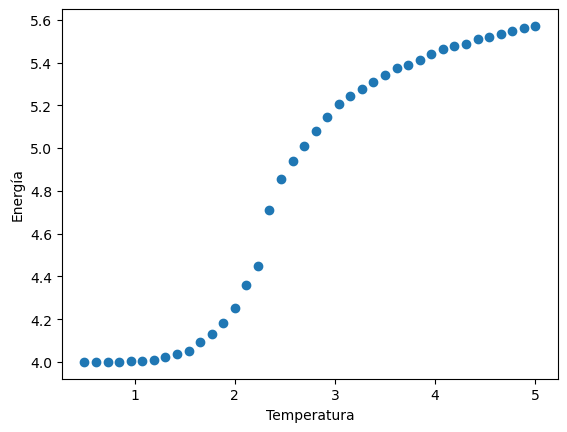

In [ ]:
import matplotlib.pyplot as plt
plt.plot(temperatures, Es.mean(axis=1) / (size * size), linestyle='None', marker='o')
plt.ylabel("Energía")
plt.xlabel("Temperatura")

Text(0.5, 0, 'Temperatura')

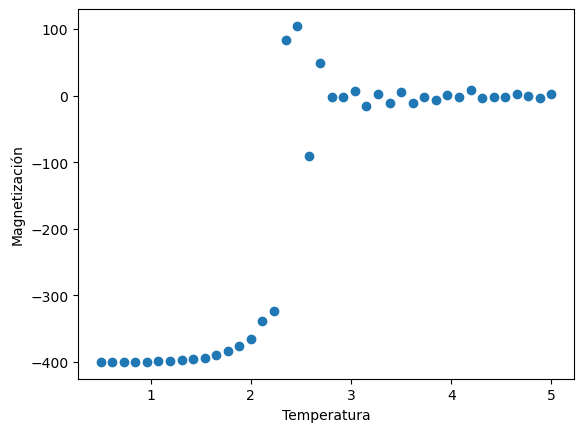

In [ ]:
plt.plot(temperatures, magnetizations[:, thermsteps:].mean(axis=1), linestyle='None', marker='o')
plt.ylabel("Magnetización")
plt.xlabel("Temperatura")

Text(0.5, 0, 'Temperatura')

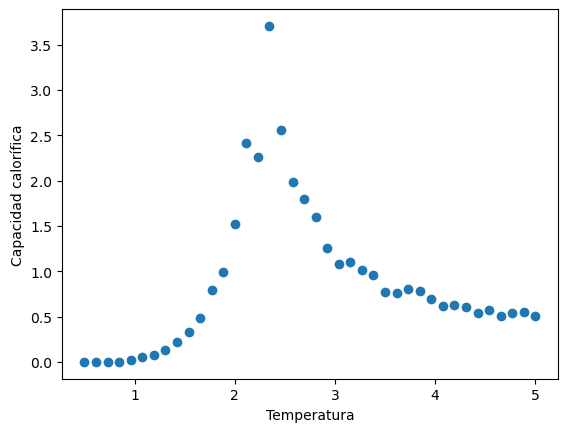

In [ ]:
plt.plot(temperatures, C, linestyle='None', marker='o')
plt.ylabel("Capacidad calorífica")
plt.xlabel("Temperatura")

## Bibliografía

Bennett, D. (2016). _Numerical Solutions to the Ising Model using the Metropolis Algorithm_. https://www.maths.tcd.ie/~dbennett/js/ising.pdf

Molignini P. (2013). _Analyzing the two dimensional Ising model with conformal field theory_. https://edu.itp.phys.ethz.ch/fs13/cft/SM2_Molignini.pdf

Montes de Oca‑Mora, N.J. et al. (2023). J. Phys.: Conf. Ser. 2459 012028. https://iopscience.iop.org/article/10.1088/1742-6596/2459/1/012028